# This script demonstrates Building a binary classifier

# Name : Eun-Yeong Jeon

# Student ID : 20153334

## github : https://github.com/Eun0/Assignment

# Import packages for plotting graphs and manipulating data :

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define normalize(data) function :

Normalize the values of the input data to be [0,1]

In [12]:
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# Define distance(x,y) function :

Compute distance between two vectors x and y

In [13]:
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

# Load train and test data :

In [14]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

# Make a matrix each column of which represents an images in a vector form :

In [15]:
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

# Plot first 150 images out of 10,000 with their labels :

(784, 60000)


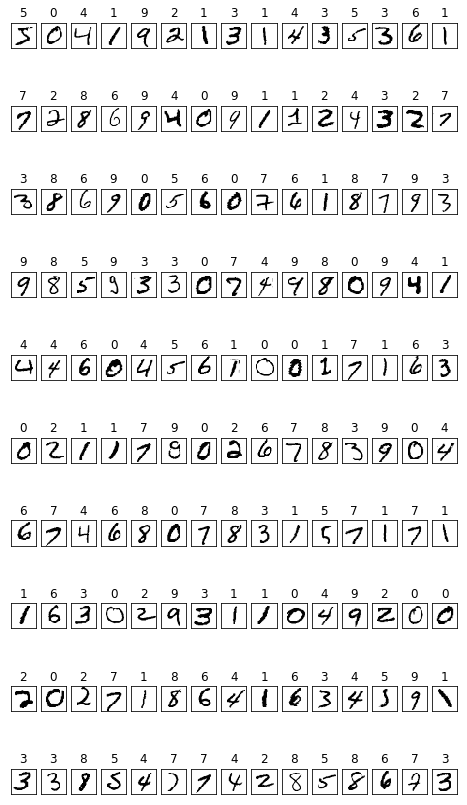

In [16]:

f1 = plt.figure(1,figsize=(8,15))

for i in range(150):

    label       = list_label_train[i]
    im_vector   = list_image_train[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
    
print(list_image_train.shape)
plt.show()

# Plot the average image of all the images for each digit(label) :

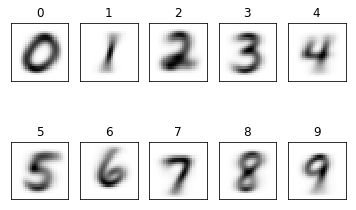

In [17]:
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_train):

    im_average[:, list_label_train[i]] += list_image_train[:, i]
    im_count[list_label_train[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# Define make_blabel(list_label) function :

- Parameter : list_label (numpy.ndarray)

  list_label : original label of data
  

- Return : blabel (numpy.ndarray)

  blabel : vectors which is obtained by applying our rule to list_label



Make vector which contains binary label(1 or -1) according to the list_label

we set label as below

label = $ \begin{cases}
 +1 & , x=0 \\ 
-1 & , otherwise 
\end{cases}$

In [18]:
def make_blabel(list_label):
    
    blabel=np.ones_like(list_label)
    
    blabel[list_label>0]=-1
    
    return blabel

#  Make blabel each vector according to the train and test data :

In [19]:
blabel_train=make_blabel(list_label_train)
blabel_test=make_blabel(list_label_test)

# Define find_theta(x,y,p) function :

- Parameters : x (numpy.ndarray), y (numpy.ndarray), p (int)

  x : N data matrix

  y : N data's blabel

  p : length of a data

  so x is (N x p) matrix ,and y is (N x 1) vector
  

- Returns : theta (numpy.ndarray), y_hat (numpy.ndarray)

  theta : an optimal set of our model's coefficient according to x

we use a model $\tilde{f}(x;\theta)=\theta_{1}f_1(x)+\theta_2f_2(x)+...+\theta_pf_p(x)$ where $f_i(x)$ pick i-th element of x vector

Find an optimal set of ($\theta_1,...,\theta_p$) by least square approximate solution

Return the optimal set of $\theta's$ and the model

********** How to find $\theta's$ **********

In matrix form,

$x_{ij}$ = j-th element of i-th data

$y$ = blabel vector , i-th element means label of i-th data 

$A=\begin{pmatrix}
 x_{11}&  x_{12}&  ....&  x_{1p}& \\ 
 x_{21}&  x_{22}&  ....&  x_{2p}& \\ 
 :&  :&  :&  :& \\ 
 :&  :&  :&  :& \\ 
 x_{n1}&  x_{n2}&  ....&  x_{np}& 
\end{pmatrix}$

we can write the model

$\tilde{f}=A\theta$

Then a optimal set of theta is as below

$\theta=(A^TA)^{-1}A^Ty$


********** CAUTION **********

$(A^TA)^{-1}A^Ty$ has exactly one solution if $(A^TA)$ is non-singular

In case $(A^TA)$ is singular, ( we can't compute $(A^TA)^{-1}$ )  

compute pseudo-inverse of $(A^TA)$ instead 





In [20]:
def find_theta(x,y,p):
    
    # Define A matrix
    a_mat=np.transpose(x)

    gram=np.matmul(np.transpose(a_mat),a_mat)
    
    # Find theta using pinv
    '''if(np.linalg.matrix_rank==gram.shape[0]):
        left=np.linalg.inv(gram)
    else:
        left=np.linalg.pinv(gram)'''
    
    # Find theta using svd method
    u,s,vt=np.linalg.svd(gram,full_matrices=True)
    
    ut=np.transpose(u)
    v=np.transpose(vt)
    
    ss=np.zeros_like(gram)
    
    for i in range(ss.shape[0]):
        ss[i][i]=s[i]
        
    left=np.matmul(np.matmul(v,np.linalg.inv(ss)),ut)
        
    right=np.matmul(np.transpose(a_mat),y)
    
    theta=np.matmul(left,right)

    return theta

# Construct a model using train data :

i.e. Find $\theta's$ according to train data

In [21]:
theta=find_theta(list_image_train,blabel_train,list_image_train.shape[0])

# Show $\theta's$ as image :

-25.585678480121004 6.957255206286902
0.0 1.0


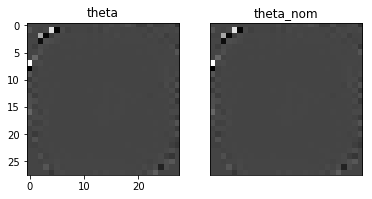

In [33]:
theta_nom=np.apply_along_axis(normalize,0,theta)

print(theta.min(),theta.max())

print(theta_nom.min(),theta_nom.max())

f4=plt.figure()


plt.subplot(1,2,1)
plt.title("theta")
plt.imshow(theta.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 


plt.subplot(1,2,2)
plt.title("theta_nom")
plt.imshow(theta_nom.reshape((size_row, size_col)), cmap='Greys', interpolation='None')

frame   = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

plt.show()

# Predict test data's label using the model :

The result we call $\tilde{f}$

$\tilde{f}=A\theta$

A : test data

In [14]:
y_tilde=np.matmul(np.transpose(list_image_test),theta)

# Define sign(x) function :


sign(x) = $ \begin{cases}
 +1 & , x \geq 0 \\ 
-1 & , otherwise 
\end{cases}$


In [15]:
def sign(y):
    
    if y>0 or y==0:
        return 1
    else:
        return -1

# Compute $\hat{f}(x)$ :

Apply sign function to $\tilde{f}(x)$

$\hat{f}(x)=sign(\tilde{f}(x))$

In [16]:
sign_vec=np.vectorize(sign)
y_hat=sign_vec(y_tilde)

# Define evaluate(y_hat,list_label) function :

- Parameter : y_hat (numpy.ndarray), list_label (numpy.ndarray)
  
  y_hat : predicted label 
  
  list_label : original label of data
  

- Return : table (numpy.ndarray)

  table : vector of evaluation value ,
  
  (0 means TP, 1 means FP, 2 means TN, 3 means FN)



Make vector which contains evaluation value (0:TP,1:FP,2:TN,3:FN) according to the list_label

In [17]:
def evaluate(y_hat,list_label):
    
    eval_vec= np.zeros((len(y_hat)),dtype=int)
    # TP : 0
    eval_vec[np.all([y_hat == 1, list_label == 0],axis=0)] =0 
    # FP : 1
    eval_vec[np.all([y_hat == 1, list_label > 0],axis=0)] = 1
    # TN : 2
    eval_vec[np.all([y_hat == -1, list_label == 0],axis=0)] = 2
    # FN : 3
    eval_vec[np.all([y_hat == -1, list_label > 0],axis=0)] = 3
    
    return eval_vec

# Evaluate the predicted label :

In [18]:
eval_vec=evaluate(y_hat,list_label_test)

# Show evaluation value as table :

In [19]:
eval_table=pd.DataFrame(columns=['TP','FP','TN','FN'],index=np.arange(1,num_test+1))

eval_table[:]=0

eval_table.loc[eval_vec==0,'TP']=1
eval_table.loc[eval_vec==1,'FP']=1
eval_table.loc[eval_vec==2,'TN']=1
eval_table.loc[eval_vec==3,'FN']=1

eval_table

,TP,FP,TN,FN
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0
5,0,0,0,1
6,0,0,0,1
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1
10,0,0,0,1


# Plot the average image of each evaluation value :

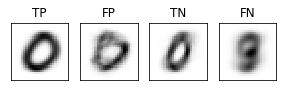

In [20]:
f3 = plt.figure()


im_average  = np.zeros((size_row * size_col, 4), dtype=float)
im_count    = np.zeros(4, dtype=int)

for i in range(num_test):

    im_average[:, eval_vec[i]] += list_image_test[:, i]
    im_count[eval_vec[i]] += 1

for i in range(4):

    im_average[:, i] /= im_count[i]
    
    plt.subplot(2, 5, i+1)
    
    if i==0:
        plt.title('TP')
    if i==1:
        plt.title('FP')
    if i==2:
        plt.title('TN')
    if i==3:
        plt.title('FN')
        
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()



# Show images whose evaluation value is FP

Number of FP : 61


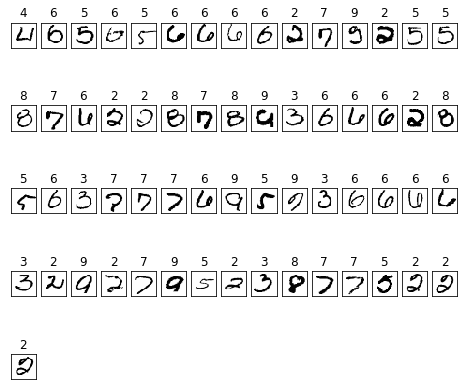

In [21]:
f4 = plt.figure(1,figsize=(8,15))

num_fp=sum(eval_vec==1)

ind=np.where(eval_vec==1)[0]

j=0
print("Number of FP :",num_fp)

for i in range(num_fp):
    label=list_label_test[ind[j]]
    im_vector=list_image_test[:,ind[j]]
    im_matrix=im_vector.reshape((size_row,size_col))
    
    plt.subplot(10,15,i+1)
    plt.title(label)
    plt.imshow(im_matrix,cmap='Greys',interpolation='None')
    
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    j+=1

plt.show()